<a href="https://colab.research.google.com/github/Sookyung99/class2021Spring/blob/main/Sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter

# **Phasor**

In [3]:
#parameter setting
amp = 1       # range [0.0, 1.0]
sr = 10000    # sampling rate, Hz
dur = 0.5     # duration in seconds
freq = 100.0  # sine frequency, Hz

In [4]:
#generate time
t = np.arange(1, sr * dur + 1) / sr

In [5]:
#generate phase
theta = t * 2*np.pi * freq

In [6]:
#generate signal by cosine-phasor
s = amp * np.sin(theta)

Text(0, 0.5, 'real')

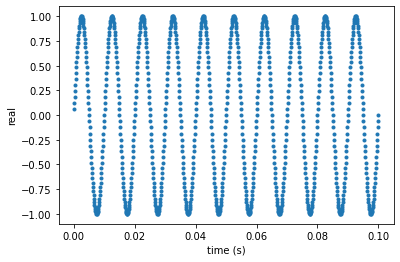

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel("time (s)")
ax.set_ylabel("real")

In [23]:
ipd.Audio(s, rate = sr)

In [24]:
#generate signal by complex-phasor
c = amp * np.exp(theta*1j)

Text(0.5, 0, ' imag')

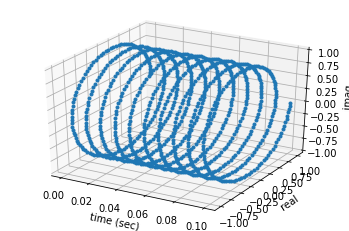

In [32]:
fig = plt.figure()
ax = plt.subplot(111, projection = '3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (sec)')
ax.set_ylabel(' real')
ax.set_zlabel(' imag')

In [37]:
import plotly.graph_objects as go
import numpy as np
x, y, z = t[0:200], c.real[0:200], c.imag[0:200]
fig = go.Figure(data = [go.Scatter3d(x = x, y = y, z = z,
                                     mode = 'markers',
                                     marker = dict(size = 3))])
fig.update_layout(scene = dict(xaxis_title = 'time (sec)',
                               yaxis_title = 'real',
                               zaxis_title = 'imag'))
fig.show()

In [38]:
ipd.Audio(c.imag, rate = sr)

In [42]:
def phasor_sine(amp, sr, dur, freq):

  t = np.arange(1, sr * dur + 1)/sr
  theta = t * 2*np.pi * freq
  s = amp * np.sin(theta)

  return s, t, theta

In [43]:
amp = 1; sr = 10000; dur = 1; freq = 440
s, t, theta = phasor_sine(amp, sr, dur, freq)
ipd.Audio(s, rate = sr)

In [46]:
def phasor_complex(amp, sr, dur, freq):

  t = np.arange(1, sr * dur + 1) / sr
  theta = t * 2 * np.pi * freq
  c = amp * np.exp(theta * 1j)

  return c, t, theta

In [47]:
amp = 1; sr = 10000; dur = 1; freq = 300.0
c, t, theta = phasor_complex(amp, sr, dur, freq)
ipd.Audio(c.imag, rate = sr)

# **Generate pulse train<br>(=source)**


In [49]:
#parameter setting
amp = 2
sr = 10000
dur = 0.5

F0 = 300
Fend = int(sr/2)

s_all = 0
for freq in range(F0, Fend + 1, F0):
  s, t, theta = phasor_sine(amp, sr, dur, freq)
  s_all += s

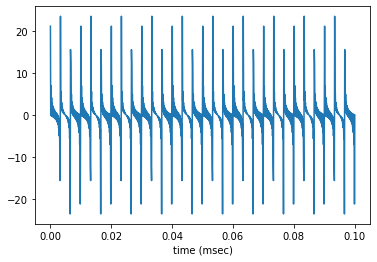

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s_all[0:1000])
ax.set_xlabel("time (msec)")
ipd.Audio(s_all, rate = sr)